<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 3 / NOTE 2*

---

# N432. Image Segmentation & Data Augmentation

# WarmUp (필수 시청)

시간이 없는 분들을 위하여 최대한 나눠두었지만, 여유를 가지고 한번 쭉 들어보실 것을 권장합니다. 영어에 익숙하지 않다면 유튜브 한글자막을 이용하면 어느정도 도움이 됩니다. 
- [스탠포드 강의자료 (1) 개념](https://youtu.be/nDPWywWRIRo?t=480) (8:00~13:54, 약 6분)
- [스탠포드 강의자료 (2) UpSampling](https://youtu.be/nDPWywWRIRo?t=995) (16:35~22:00, 약 4분)
- [스탠포드 강의자료 (3) Transpose Covolution](https://youtu.be/nDPWywWRIRo?t=1345) (22:25~30:20, 약 8분)
- [스탠포드 강의자료 (4) RCNN](https://youtu.be/nDPWywWRIRo?t=2975) (49:35~1:07:07, 약 16분)
- [스탠포드 강의자료 (5) instance segmentation](https://youtu.be/nDPWywWRIRo?t=4051) (1:07:31~1:12:52, 약 5분)
- [Unet 튜토리얼](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)


단어정리
- crop : 이미지를 작은 조각으로 잘라내는 것

# 🏆 학습목표

- Image Segmentation 개념을 이해하고 대표 모델을 활용할 수 있다. 
- Image Augmentation의 개념을 이해하고, 기본적인 증강방식을 활용할 수 있다. 
- Object Recognition 개념을 이해하고, 활용할 수 있다. 

# 이미지 분할(Image Segmentation)

이전에는 기본적인 신경망 또는 CNN 네트워크를 이용하여 입력 이미지에 해당하는 출력 레이블(label) 또는 범주(class)를 할당하는 이미지 분류를 공부했습니다. <br> Vision 연구가 발전된 방향을 보면, 처음에는 분류만 해보다가, 입력 이미지에서 개체(Object)가 있는 위치를 찾을 수 있을까? 또 해당 개체들을 의미적(semantic)으로 분류해볼 순 없을까? 이미지 안에 한 개의 클래스만 있는 게 아니라 여러 종류의 클래스가 있다면, 각각의 픽셀들이 어느 클래스에 속하는 지 알 수 있을까?  이런 문제들을 어떻게 해결할 지 상상해봅시다. (상상하는 시간... $10^0, 10^1, 10^2$ 초 정도...)

정답을 알고 계시거나, 충분히 생각해보셨으면 다음으로 넘어가고, 아직 잘 모르겠다고 하면, 잠시 생각하는 시간을 조금 더 가져보길 추천합니다. 이런 상상력들이 뭉쳐서 새로운 아키텍쳐가 나오기 때문이죠. CNN이 없던 시절도 있고, ResNet이 나오기 전과 후가 달라졌고, UNet 등 딥러닝 기반의 Segmentation 알고리즘도 누군가의 고민에 의해서 나오게 된 것이니까요!!

저만 이미지를 여러개의 이미지로 분할하고 싶은가요 ?<br> 분할된 각 이미지마다 혹은 각 픽셀마다 레이블이 부여되어 있으면 학습할 수 있지 않을까요? 

이미지 분할을 위해서 이미지를 픽셀 단위의 마스크를 정보를 출력하도록 신경망를 훈련시켜볼 것입니다. 이것은 기존 단계보다 더 낮은 레벨, 즉 픽셀 레벨에서 이미지를 이해하는 데 도움이 됩니다. 또 하나의 이미지에서 또는 동영상에서 여러 물체를 인식하는 사람과 한층 더 가까워진 인공지능의 기술이라고 생각됩니다. 

이미지 분할은 **의료 영상, 자율주행차, 보안, 위성, 항공사진** 등의 분야에서 많이 응용이 되고 있습니다.

가장 전통적인 방식의 이미지 분할을 FCN이라고 하여 고양이 그림이 있는 형태로 구성되며, 비교적 최근에 개발된 Unet 이후에는 대부분 Unet이 이미지 분할 계는 천하통일을 했다고 보여집니다. 그러나 언제까지 이 기술이 지배할 지는 두고보아야하겠습니다.  분할(Segmentation)에서 조금 더 픽셀레벨로 들어가는 분야를 명명할 때, instance segmentation 개념도 나타나니, 이후 이미지 분할 기법에 관심이 있는 분들께서는 다음 키워드들이 어떤 차이가 있는지, 각각의 대표적인 모델이 무엇인지 찾아보며 공부하시면 더 좋습니다. 

<img src="https://chadrick-kwag.net/wp-content/uploads/2020/09/fwfewfewfewq.png" width=600>
<img src="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png" width=1200> 


이번 튜토리얼에 사용 될 데이터 세트는  Parkhi *et al*이 만든 [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/)입니다. 데이터 세트는 영상, 해당 레이블과 픽셀 단위의 마스크로 구성됩니다. 마스크는 기본적으로 각 픽셀의 레이블입니다. 각 픽셀은 다음 세 가지 범주 중 하나가 주어집니다:

*   class 1 : 애완동물이 속한 픽셀
*   class 2 : 애완동물과 인접한 픽셀
*   class 3 : 위에 속하지 않는 경우/주변 픽셀

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-1khu14ni
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-1khu14ni
  Created wheel for tensorflow-examples: filename=tensorflow_examples-1ec543bc44ea3b3c320d3f276c8b1f8baa55a02c_-cp37-none-any.whl size=265894 sha256=834ae1259e47f510673c10633a580fb06f3f51913d8dfbaf17a9749d7d4b66e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-id6_luh8/wheels/83/64/b3/4cfa02dc6f9d16bf7257892c6a7ec602cd7e0ff6ec4d7d714d
Successfully built tensorflow-examples
     |████████████████████████████████| 3.9MB 4.2MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

## Oxford-IIIT Pets 데이터 세트를 다운로드 하기

데이터 세트는 이미 텐서플로 데이터 세트에 포함되어 있으며, 다운로드만 하면 됩니다. 분할 마스크는 버전 3+에 포함되어 있습니다. 

In [ ]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


다음 코드는 이미지를 뒤집는 간단한 이미지 증강을 수행합니다. <br> 또한, 영상이 [0,1]로 정규화됩니다. <br> 마지막으로, 위에서 언급한 것처럼 분할 마스크의 픽셀에 {1, 2, 3}이라는 레이블이 붙습니다. <br> 편의성을 위해 분할 마스크에서 1을 빼서 레이블이 {0, 1, 2}이 되도록 합시다.

In [ ]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [ ]:
@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
# data augmentation
  if tf.random.uniform(()) > 0.5: # 50% 확률로... (0~1 사이값 중에서 절반)
    input_image = tf.image.flip_left_right(input_image) # 좌우반전
    input_mask = tf.image.flip_left_right(input_mask)   # 레이블도 좌우반전

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

데이터 세트에는 이미 필요한 몫의 시험과 훈련이 포함되어 있으므로 동일한 분할을 계속 사용합시다.

In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE # // 나누기 후 소수점 버림

STEPS_PER_EPOCH

57

In [ ]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE) # auto
test = dataset['test'].map(load_image_test)

In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

이미지 예제와 데이터 세트에서 대응하는 마스크를 보도록 합시다. 

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

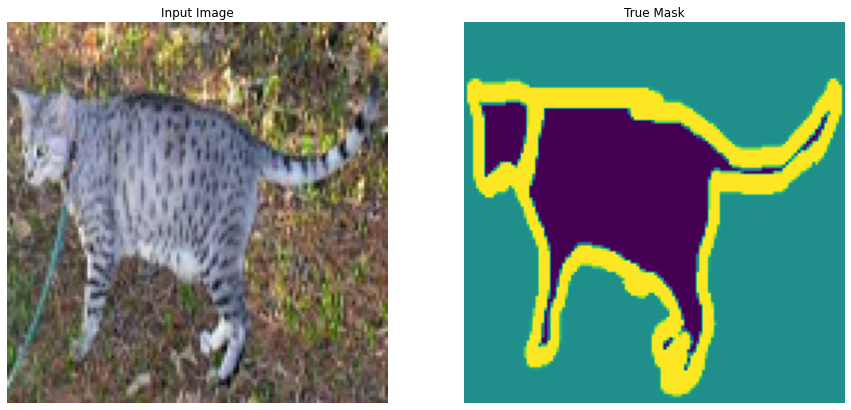

In [ ]:
for image, mask in train.take(100):
  sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

## 모델 정의하기
여기서 사용하는 모델은 수정된 U-Net입니다. U-Net은 인코더(다운샘플러)와 디코더(업샘플러)를 포함합니다. 강력한 기능을 학습하고 훈련 가능한 매개변수의 수를 줄이기 위해 미리 훈련된 모델을 인코더로 사용할 수 있습니다. 따라서 이번 과제의 인코더는 미리 훈련된 MobileNetV2 모델이 될 것이며 이 모델의 중간 출력이 사용될 것입니다. 디코더는 [Pix2pix 튜토리얼](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py)의 TensorFlow 예제에서 이미 구현된 업샘플 블록이 될 것입니다. 

3개의 채널을 출력하는 이유는 픽셀당 3개의 가능한 라벨이 있기 때문입니다. 이것을 각 화소가 세 개의 class로 분류되는 다중 분류라고 생각하세요. 

In [ ]:
OUTPUT_CHANNELS = 3

언급된 바와 같이 인코더는 미리 훈련된 MobileNetV2 모델이 될 것이며, [tf.keras.applications](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/applications)에서 사용될 준비가 될 것입니다. 인코더는 모델의 중간 층에서 나오는 특정 출력으로 구성됩니다. 인코더는 교육 과정 중에 학습되지 않는다는 점에 유의하세요.

In [ ]:
# 여러 모델들을 확인할 수 있음.
# tf.keras.applications.

<module 'tensorflow.keras.applications' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/applications/__init__.py'>

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False) # 기존 인풋사이즈 재사용 False

#이 층들의 활성화를 이용합시다
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# 특징추출 모델을 만듭시다
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

디코더/업샘플러는 TensorFlow 예제에서 구현된 일련의 업샘플 블록입니다.

In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

# Upsample : https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py

In [ ]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # 모델을 통해 다운샘플링합시다
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # 건너뛰기 연결을 업샘플링하고 설정하세요
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # 이 모델의 마지막 층입니다
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

## 모델 훈련하기
이제 모델을 컴파일하고 훈련시키는 일만 남았습니다. 여기서 사용되고 있는 손실 함수는 loss.sparse_categorical_crossentropy입니다. 이 손실 함수를 사용하는 이유는 네트워크가 멀티 클래스 예측과 마찬가지로 픽셀마다 레이블을 할당하려고 하기 때문입니다. 실제 분할 마스크에서 각 픽셀은 {0,1,2}를 가지고 있습니다. 이곳의 네트워크는 세 개의 채널을 출력하고 있습니다. 기본적으로 각 채널은 클래스를 예측하는 방법을 배우려고 하고 있으며, loss.sparse_categical_crossentropy는 그러한 시나리오에 권장되는 손실입니다. 네트워크의 출력을 사용하여 픽셀에 할당된 레이블은 가장 높은 값을 가진 채널입니다.이것이 create_mask 함수가 하는 일입니다.

In [ ]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

만들어진 모델의 구조를 간략히 살펴 보겠습니다.

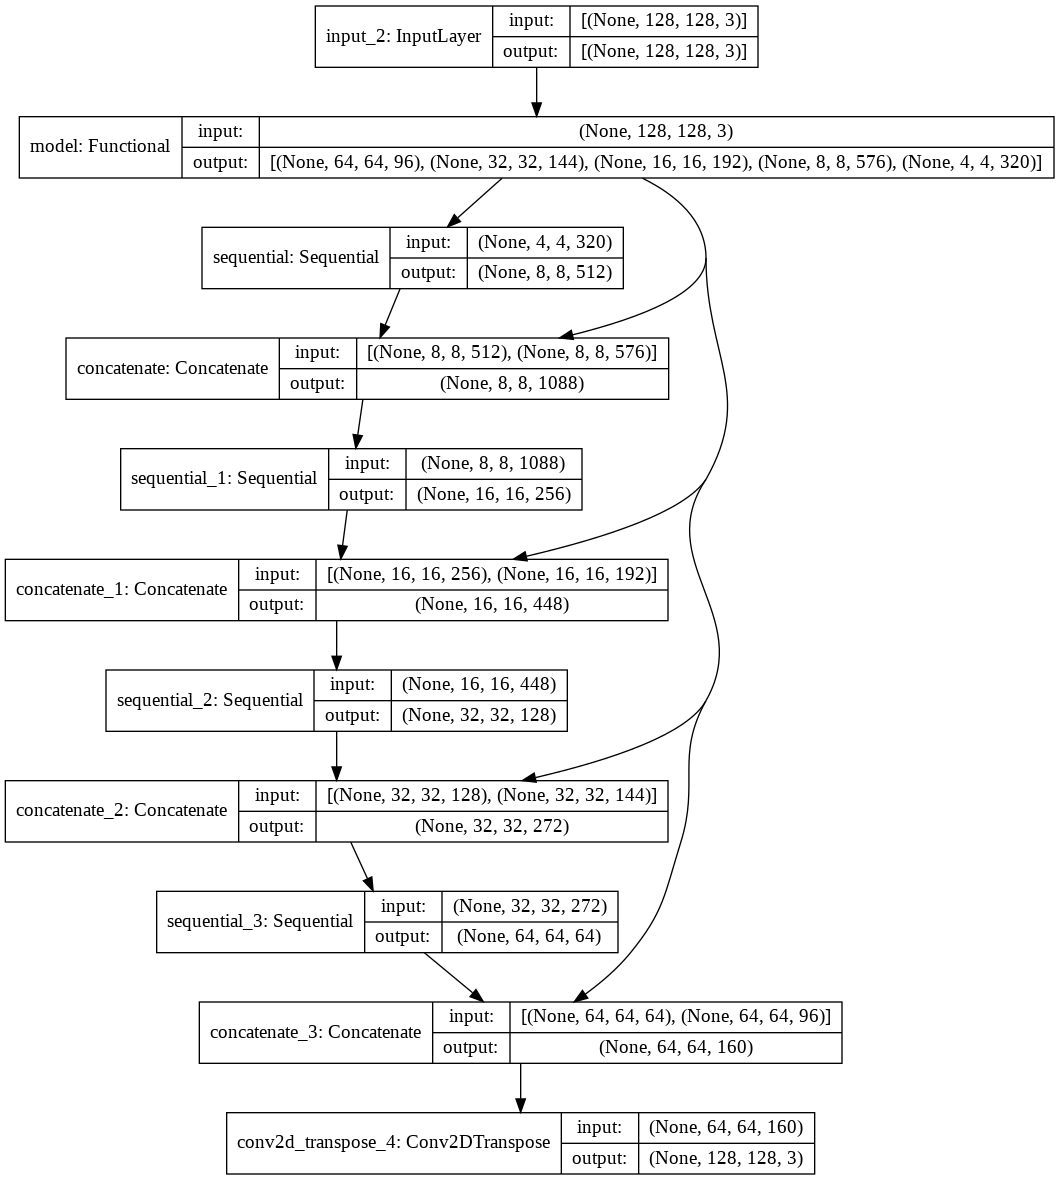

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

모델을 시험해보고 훈련 전에 예측한 것이 무엇인지 알아봅시다. 

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

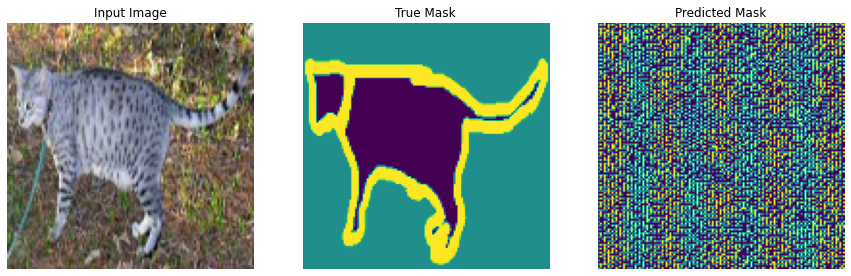

In [ ]:
show_predictions()

모델이 훈련하는 동안 어떻게 향상되는지 관찰해 봅시다. 이 작업을 수행하기 위해 콜백 함수가 아래에 정의되어 있습니다.

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

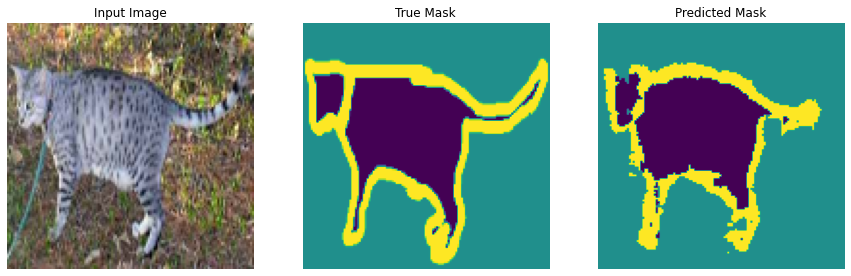


에포크 이후 예측 예시 20



In [ ]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

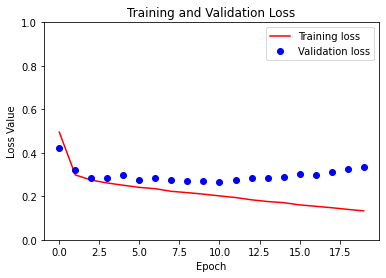

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

## 예측하기

몇 가지 예측을 해봅시다. 시간을 절약하기 위해 에포크 수를 작게 유지했지만, 보다 정확한 결과를 얻기 위해 에포크를 더 높게 설정할 수 있습니다.

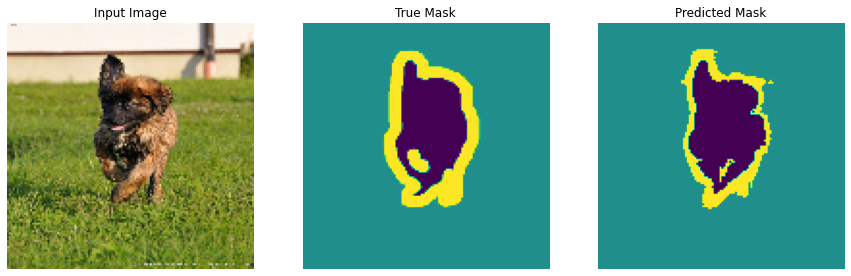

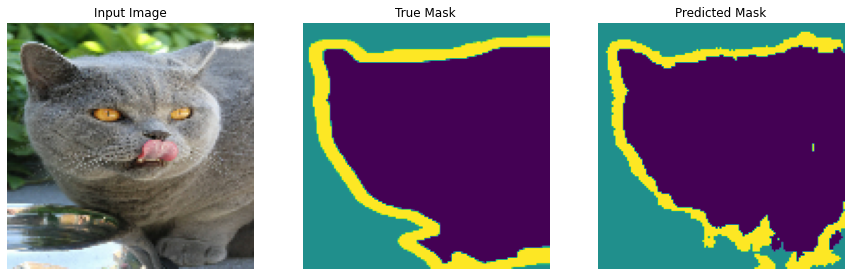

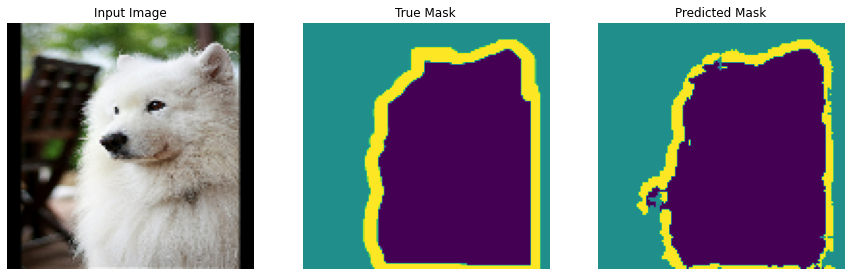

In [ ]:
show_predictions(test_dataset, 3)

## 참조
- [텐서플로 튜토리얼 공식 영문 문서](https://www.tensorflow.org/?hl=en)
- [tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n) 


# 데이터 증강 (Data Augmentation)


## 개요

이 튜토리얼에서는 이미지 회전과 같은 무작위(그러나 사실적인) 변환을 적용하여 훈련 세트의 다양성을 증가시키는 기술인 데이터 증강의 예를 보여줍니다. 두 가지 방법으로 데이터 증강을 적용하는 방법을 배웁니다. 먼저, [Keras 전처리 레이어](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/)를 사용하고, 그 다음으로 `tf.image`를 사용합니다.

## 설정

In [ ]:
!pip install tf-nightly

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

## 데이터세트 다운로드

이 튜토리얼에서는 [tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers) 데이터세트를 사용합니다. 편의를 위해 [TensorFlow Datasets](https://www.tensorflow.org/datasets)를 사용하여 데이터세트를 다운로드합니다. 데이터를 가져오는 다른 방법을 알아보려면 [이미지 로드](https://www.tensorflow.org/tutorials/load_data/images) 튜토리얼을 참조하세요.


In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


꽃 데이터세트에는 5개의 클래스가 있습니다.

In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


데이터세트에서 이미지를 검색하고 이를 사용하여 데이터 증강을 수행하겠습니다.

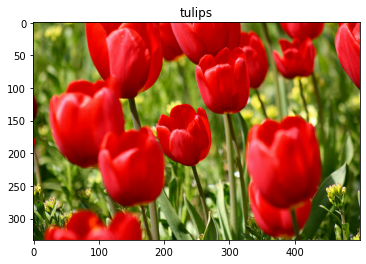

In [ ]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

## Keras 전처리 레이어 사용하기

참고: 이 섹션에서 소개하는 [Keras 전처리 레이어](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing)는 현재 실험적 단계입니다.

### 크기 및 배율 조정하기


전처리 레이어를 사용하여 이미지를 일관된 모양으로 [크기 조정](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Resizing)하고 픽셀 값의 [배율을 조정](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling)할 수 있습니다.

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

참고: 위의 배율 조정 레이어는 픽셀 값을 `[0,1]`로 표준화합니다. 그렇지 않고 `[-1,1]`을 원할 경우, `Rescaling(1./127.5, offset=-1)`을 작성하면 됩니다.


이러한 레이어를 이미지에 적용한 결과를 볼 수 있습니다. 

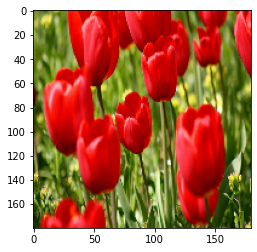

In [ ]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

픽셀이 `[0-1]`에 있는지 확인할 수 있습니다.

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


### 데이터 증강

데이터 증강에도 전처리 레이어를 사용할 수 있습니다.

몇 개의 전처리 레이어를 만들어 동일한 이미지에 반복적으로 적용 해 보겠습니다.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing

In [ ]:
# Add the image to a batch
image = tf.expand_dims(image, 0)

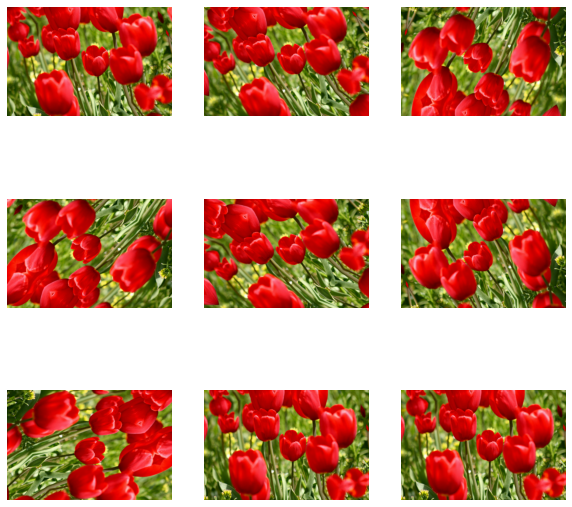

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

`layers.RandomContrast`, `layers.RandomCrop`, `layers.RandomZoom` 등 데이터 증강에 사용할 수 있는 다양한 전처리 [레이어](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing)가 있습니다.

### 전처리 레이어를 사용하는 두 가지 옵션

중요한 절충을 통해 이러한 전처리 레이어를 사용할 수 있는 두 가지 방법이 있습니다.

#### 옵션 1: 전처리 레이어를 모델의 일부로 만들기

In [ ]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

이 경우 유의해야 할 두 가지 중요한 사항이 있습니다.

- 데이터 증강은 나머지 레이어와 동기적으로 기기에서 실행되며 **GPU 가속**을 이용합니다.

- `model.save`를 사용하여 모델을 내보낼 때 전처리 레이어가 모델의 나머지 부분과 함께 저장됩니다. 나중에 이 모델을 배포하면 레이어 구성에 따라 이미지가 자동으로 표준화됩니다. 이를 통해 서버측 논리를 다시 구현해야 하는 노력을 덜 수 있습니다.

참고: 데이터 증강은 테스트할 때 비활성화되므로 입력 이미지는 `model.fit`(`model.evaluate` 또는 `model.predict`가 아님) 호출 중에만 증강됩니다.

#### 옵션 2: 데이터세트에 전처리 레이어 적용하기

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

이 접근 방식에서는 `Dataset.map`을 사용하여 증강 이미지 배치를 생성하는 데이터세트를 만듭니다. 이 경우에는 다음과 같습니다.

- 데이터 증강은 **CPU**에서 비동기적으로 이루어지며 차단되지 않습니다. 아래와 같이 `Dataset.prefetch`를 사용하여 GPU에서 모델 훈련을 데이터 전처리와 중첩할 수 있습니다.
- 이 경우, 전처리 레이어는 `model.save`를 호출할 때 모델과 함께 내보내지지 않습니다. 저장하기 전에 이 레이어를 모델에 연결하거나 서버측에서 다시 구현해야 합니다. 훈련 후, 내보내기 전에 전처리 레이어를 연결할 수 있습니다.


[이미지 분류](https://www.tensorflow.org/tutorials/images/classification) 튜토리얼에서 첫 번째 옵션의 예를 볼 수 있습니다. 여기에서는 두 번째 옵션을 살펴보겠습니다.

### 데이터세트에 전처리 레이어 적용하기

위에서 생성한 전처리 레이어로 훈련, 검증 및 테스트 데이터세트를 구성합니다. 또한 병렬 읽기 및 버퍼링된 프리페치를 사용하여 I/O 차단 없이 디스크에서 배치를 생성하여 성능을 높이도록 데이터세트를 구성합니다. [tf.data API로 성능 향상하기](https://www.tensorflow.org/guide/data_performance) 가이드에서 데이터세트 성능에 대해 자세히 알아볼 수 있습니다. 

참고: 데이터 증강은 훈련 세트에만 적용해야 합니다.

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

### 모델 훈련하기

완성도를 높이기 위해 이제 이러한 데이터세트를 사용하여 모델을 훈련합니다. 이 모델은 정확성에 목표를 두고 조정되지 않았습니다(작동 방식을 시연하는 것이 목표임).

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 45s 128ms/step - loss: 1.4877 - accuracy: 0.3378 - val_loss: 1.2423 - val_accuracy: 0.5204
Epoch 2/5
92/92 [==============================] - 10s 101ms/step - loss: 1.1254 - accuracy: 0.5490 - val_loss: 1.0362 - val_accuracy: 0.5995
Epoch 3/5
92/92 [==============================] - 10s 102ms/step - loss: 1.0058 - accuracy: 0.5877 - val_loss: 0.9426 - val_accuracy: 0.6757
Epoch 4/5
92/92 [==============================] - 10s 102ms/step - loss: 0.9304 - accuracy: 0.6285 - val_loss: 0.9565 - val_accuracy: 0.6322
Epoch 5/5
92/92 [==============================] - 10s 102ms/step - loss: 0.8918 - accuracy: 0.6547 - val_loss: 0.8652 - val_accuracy: 0.6785


In [ ]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 1s 42ms/step - loss: 0.9024 - accuracy: 0.6431
Accuracy 0.6430517435073853


### 사용자 정의 데이터 증강

사용자 정의 데이터 증강 레이어를 만들 수도 있습니다. 이 튜토리얼에서는 두 가지 방법을 소개합니다. 먼저, `layers.Lambda` 레이어를 생성합니다. 이것은 간결한 코드를 작성하는 좋은 방법입니다. 다음으로, 제어력을 높여주는 [서브 클래스 생성](https://www.tensorflow.org/guide/keras/custom_layers_and_models)을 통해 새 레이어를 작성합니다. 두 레이어는 확률에 따라 이미지의 색상을 무작위로 반전합니다. 

In [ ]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [ ]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

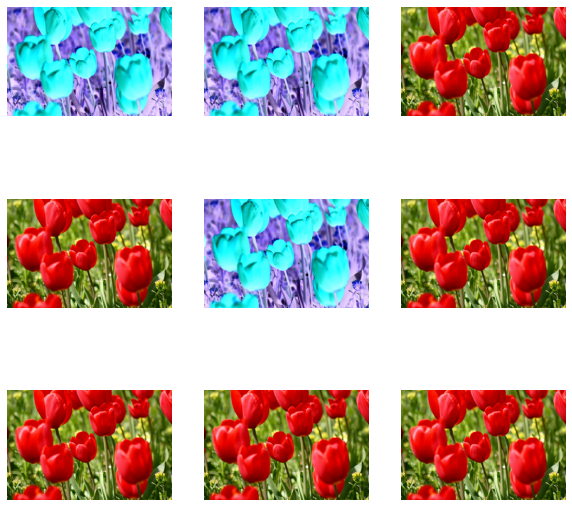

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

다음으로, [서브 클래스 생성](https://www.tensorflow.org/guide/keras/custom_layers_and_models)을 통해 사용자 정의 레이어를 구현합니다.

In [ ]:
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

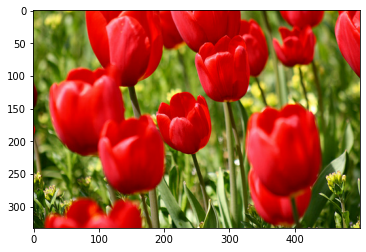

In [ ]:
_ = plt.imshow(RandomInvert()(image)[0])

위의 옵션 1과 2의 설명에 따라 이 두 레이어를 모두 사용할 수 있습니다.

## tf.image 사용하기

위의 `layers.preprocessing` 유틸리티는 편리합니다. 보다 세밀한 제어를 위해서는 `tf.data` 및 `tf.image`를 사용하여 고유한 데이터 증강 파이프라인 또는 레이어를 작성할 수 있습니다. [TensorFlow 애드온 이미지: 작업](https://www.tensorflow.org/addons/tutorials/image_ops) 및 [TensorFlow I/O: 색 공간 변환](https://www.tensorflow.org/io/tutorials/colorspace)도 확인해보세요.

꽃 데이터세트는 이전에 데이터 증강으로 구성되었으므로 다시 가져와서 새로 시작하겠습니다.

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

작업할 이미지를 검색합니다.

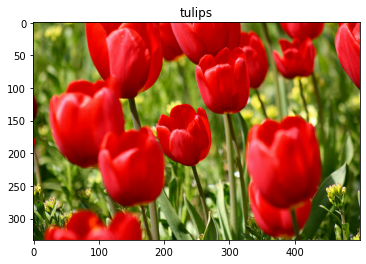

In [ ]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

다음 함수를 사용하여 원본 이미지와 증강 이미지를 나란히 시각화하고 비교하겠습니다.

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

### 데이터 증강

### 이미지 뒤집기

이미지를 수직 또는 수평으로 뒤집습니다.

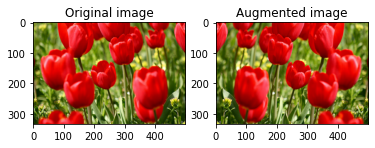

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

### 이미지를 회색조로 만들기

이미지를 회색조로 만듭니다.

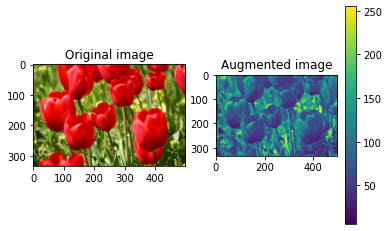

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

### 이미지 포화시키기

채도 계수를 제공하여 이미지를 포화시킵니다.

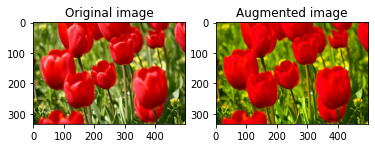

In [ ]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

### 이미지 밝기 변경하기

밝기 계수를 제공하여 이미지의 밝기를 변경합니다.

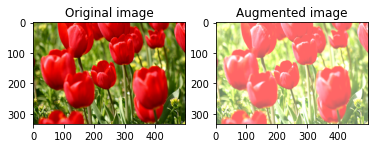

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

### 이미지 중앙 자르기

이미지를 중앙에서 원하는 이미지 부분까지 자릅니다.

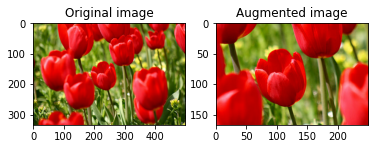

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image,cropped)

### 이미지 회전하기

이미지를 90도 회전합니다.

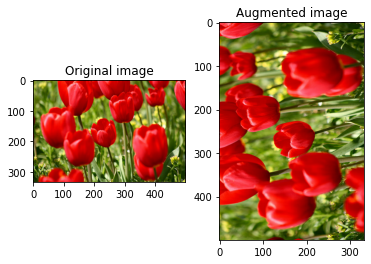

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

### 데이터세트에 증강 적용하기

이전과 마찬가지로 `Dataset.map`을 사용하여 데이터 증강을 데이터세트에 적용합니다.

In [ ]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [ ]:
def augment(image,label):
  image, label = resize_and_rescale(image, label)
  # Add 6 pixels of padding
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
   # Random crop back to the original size
  image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  image = tf.clip_by_value(image, 0, 1)
  return image, label

### 데이터세트 구성하기

In [ ]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
) 

In [ ]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [ ]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

이제 이러한 데이터세트를 사용하여 이전에 표시한 대로 모델을 훈련할 수 있습니다.

# 객체 인식 (Object Recognition) : 사전 학습된 이미지 분류 신경망을 사용하여 다중 객체 검출하기

- CNN의 가운데 레이어의 출력 결과인 피쳐 맵 위에 슬라이딩 윈도우를 올린다. 
- 사전 학습된 신경망은 해당 이미지의 클래스를 반환한다. 
- 만약 이미지에서 서로다른 객체가 검출되면 확률값을 둘로 쪼개서 반환한다. 
- 하나의 객체만 나오더라도 충분한 활률값이 아니면 분할하여 반환한다. 

다중객체를 찾는 방법의 하나는 이미지 위에 슬라이딩 윈도우를 올리고 윈도우 내에서 단일 객체 검출을 시도하는 것이다. 이미지를 224x224로 다운 샘플링 하는 대신에 원본을 두배로 을려 448x448로 샘플링을 한다. 그 다움 Crop된 이미지를 만들어 분류기에 넣는다. 



In [ ]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 153kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
from keras.applications import vgg16
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, TimeDistributed
import numpy as np
from collections import Counter, defaultdict
from keras.preprocessing import image
from PIL import ImageDraw

from scipy.misc import imread, imresize, imsave, fromimage, toimage

try:
    from io import BytesIO
except ImportError:
    from StringIO import StringIO as BytesIO
import PIL
from IPython.display import clear_output, Image, display, HTML

In [ ]:
def showarray(a, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

def preprocess_image(image_path, target_size=None):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg16.preprocess_input(img)
    return img

def deprocess_image(x, w, h):
    x = x.copy()
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, w, h))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((w, h, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
base_model = vgg16.VGG16(weights='imagenet', include_top=True)
base_model.summary()

553467904/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
from google.colab import files
files.upload()

Saving cat_dog.jpg to cat_dog.jpg


{'cat_dog.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x03\xbc\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x00\x07\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x00\x08\t\xff\xc4\x00M\x10\x00\x02\x01\x03\x03\x02\x04\x03\x06\x05\x04\x01\x03\x00\x02\x13\x01\x02\x03\x04\x11!\x00\x121\x05A\x13"Qa\x06q\x81\x07\x142\x91\xa1\xf0#B\xb1\xc1\xd1\x15R\xe1\xf1\x08$3br\x16\x82C%\x9

In [ ]:
cat_dog = preprocess_image('cat_dog.jpg', target_size=(224, 224))
preds = base_model.predict(cat_dog)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02099601', 'golden_retriever', 0.09932627), ('n02100735', 'English_setter', 0.053414267), ('n02106662', 'German_shepherd', 0.04876063)]


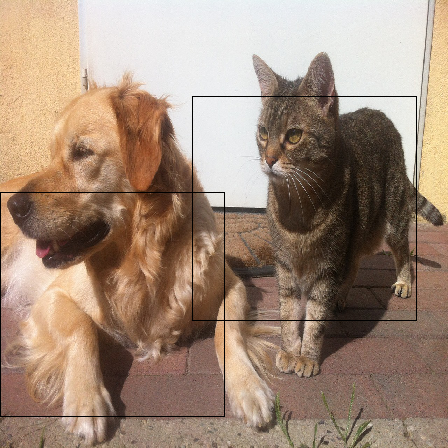

In [ ]:
cat_dog_img = image.load_img('cat_dog.jpg', target_size=(448, 448))
draw = ImageDraw.Draw(cat_dog_img)
draw.rectangle((192, 96, 416, 320), outline=(0, 0, 0))
draw.rectangle((0, 192, 224, 416), outline=(0, 0, 0))
cat_dog_img

이미지를 확대한다.

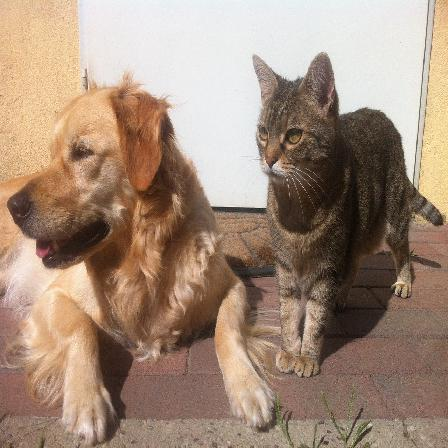

In [ ]:
cat_dog2 = preprocess_image('cat_dog.jpg', target_size=(448, 448))
showarray(deprocess_image(cat_dog2, 448, 448))

여러 구획으로 나눠준다. 

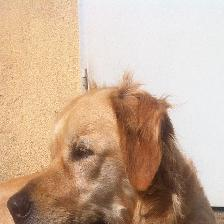

In [ ]:
crops = []
for x in range(7):
    for y in range(7):
        crops.append(cat_dog2[0, x * 32: x * 32 + 224, y * 32: y * 32 + 224, :])
crops = np.asarray(crops)
showarray(deprocess_image(crops[0], 224, 224))

각각의 이미지를 분류기에 넣고 어떤 클래스가 나오는 지 확인한다. 

In [ ]:
preds = base_model.predict(vgg16.preprocess_input(crops))
crop_scores = defaultdict(list)
for idx, pred in enumerate(vgg16.decode_predictions(preds, top=1)):
    _, label, weight = pred[0]
    crop_scores[label].append((idx, weight))
crop_scores.keys()

dict_keys(['Labrador_retriever', 'Norwegian_elkhound', 'tiger_cat', 'Egyptian_cat', 'tabby', 'kuvasz', 'flat-coated_retriever', 'standard_schnauzer'])

여러 이미지에서 개나 고양이가 검출된 것을 확인할 수 있다. 그렇나 여러개의 품종으로 검출된 것을 볼 수 있다. 여러개의 레이블 중에서 가장 높은 확률의 이미지를 찾는 것을 실행시켜보자. 

In [ ]:
crops.shape

(49, 224, 224, 3)

27


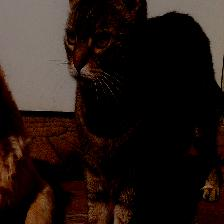

In [ ]:
def best_image_for_label(l, label):
    idx = max(l[label], key=lambda t:t[1])[0]
    print(idx)
    return deprocess_image(crops[idx,:,:,:], 224, 224)

showarray(best_image_for_label(crop_scores, 'Egyptian_cat'))

29


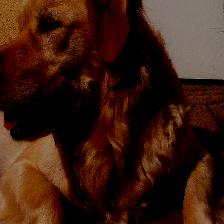

In [ ]:
showarray(best_image_for_label(crop_scores, 'Labrador_retriever'))

In [ ]:
def create_top_model(base_model):
    inputs = Input(shape=(7, 7, 512), name='input')
    flatten = Flatten(name='flatten')(inputs)
    fc1 = Dense(4096, activation='relu', name='fc1')(flatten)
    fc2 = Dense(4096, activation='relu', name='fc2')(fc1)
    predictions = Dense(1000, activation='softmax', name='predictions')(fc2)
    model = Model(inputs, predictions, name='top_model')
    for layer in model.layers:
        if layer.name != 'input':
            print(layer.name)
            layer.set_weights(base_model.get_layer(layer.name).get_weights())
    return model

top_model = create_top_model(base_model)
top_model.summary()

flatten
fc1
fc2
predictions
Model: "top_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 7, 7, 512)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   
Total params: 123,642,856
Trainable params: 123,642,856
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bottom_model = vgg16.VGG16(weights='imagenet', include_top=False)
bottom_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
p0 = base_model.predict(crops[:1])
vgg16.decode_predictions(p0, top=1)

[[('n02099601', 'golden_retriever', 0.40885553)]]

In [ ]:
b0 = bottom_model.predict(crops[:1])
t0 = top_model.predict(b0[:, :, :, :])
vgg16.decode_predictions(t0, top=1)

[[('n02099601', 'golden_retriever', 0.40885553)]]

이제 bottom_model을 이용한 output을 crop하여 입력으로 사용한다. 이렇게 하면 bottom_model을의 수행횟수가 64번에서 4번으로 크게 줄어든다. 먼저 bottom_model에 이미지를 입력하여 그 결과를 bottom_out에 저장한다. 

In [ ]:
bottom_out = bottom_model.predict(cat_dog2)
bottom_out.shape

(1, 14, 14, 512)

그리고 bottom_out을 crop 한다.

In [ ]:
vec_crops = []
for x in range(7):
    for y in range(7):
        vec_crops.append(bottom_out[0, x: x + 7, y: y + 7, :])
vec_crops = np.asarray(vec_crops)
vec_crops.shape

(49, 7, 7, 512)

In [ ]:
t0 = top_model.predict(vec_crops[:1])
vgg16.decode_predictions(t0, top=1)

[[('n02099601', 'golden_retriever', 0.3582282)]]

In [ ]:
b0.shape

(1, 7, 7, 512)

In [ ]:
crop_pred = top_model.predict(vec_crops)
l = defaultdict(list)
for idx, pred in enumerate(vgg16.decode_predictions(crop_pred, top=1)):
    _, label, weight = pred[0]
    l[label].append((idx, weight))
l.keys()

dict_keys(['golden_retriever', 'tennis_ball', 'tabby', 'tiger_cat', 'Rhodesian_ridgeback', 'Egyptian_cat', 'German_shepherd'])

35


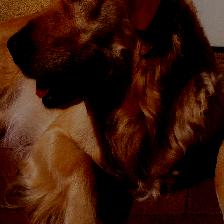

In [ ]:
showarray(best_image_for_label(l, 'golden_retriever'))

6


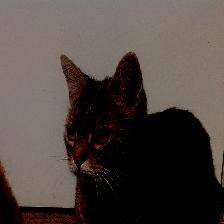

In [ ]:
showarray(best_image_for_label(l, 'tabby'))

이렇게 하면 보다 빠르게 결과를 얻을 수 있다. 

# Reference

- https://www.tensorflow.org/tutorials/images/segmentation
- https://github.com/kentaroy47/frcnn-from-scratch-with-keras
- https://www.youtube.com/watch?v=nDPWywWRIRo